# PCA    -    ACP Extraccion de Caracteristicas

 *Pre-procesamiento de los datos*


De las "m" variables independientes del dataset, PCA extrae las p <= m nuevas variables independientes que explican la mayor parte de la varianza del dataset

    Sin importar el valor de la variable dependiente



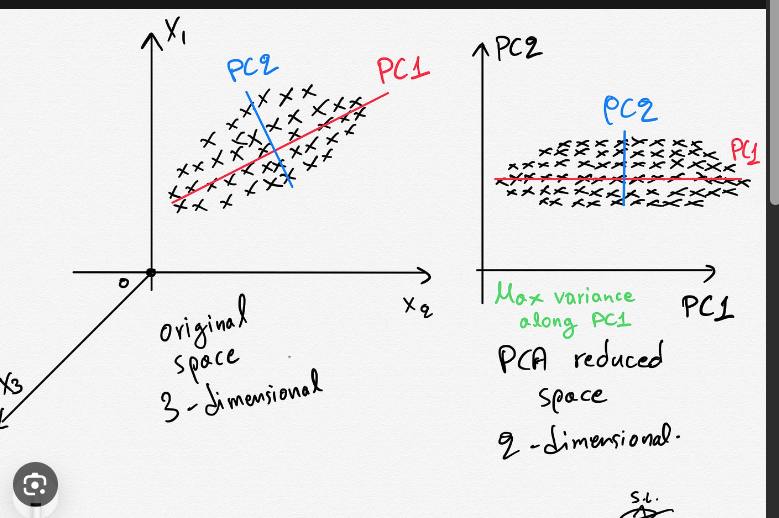

## Pasos:

1.- Aplicar escalado de variables a la matriz de caracteristicas 'X', formada por 'm' variables independientes

2.- Calcular la matriz de covarianzas de las 'm' variables independientes de 'X'

3.- Calcular los valores y vectores propios de la matriz de covarianzas.

4.- Elegir un porcentaje 'P' de varianza explicada y elegir los p <= m valores propios mas grandes, tales que 


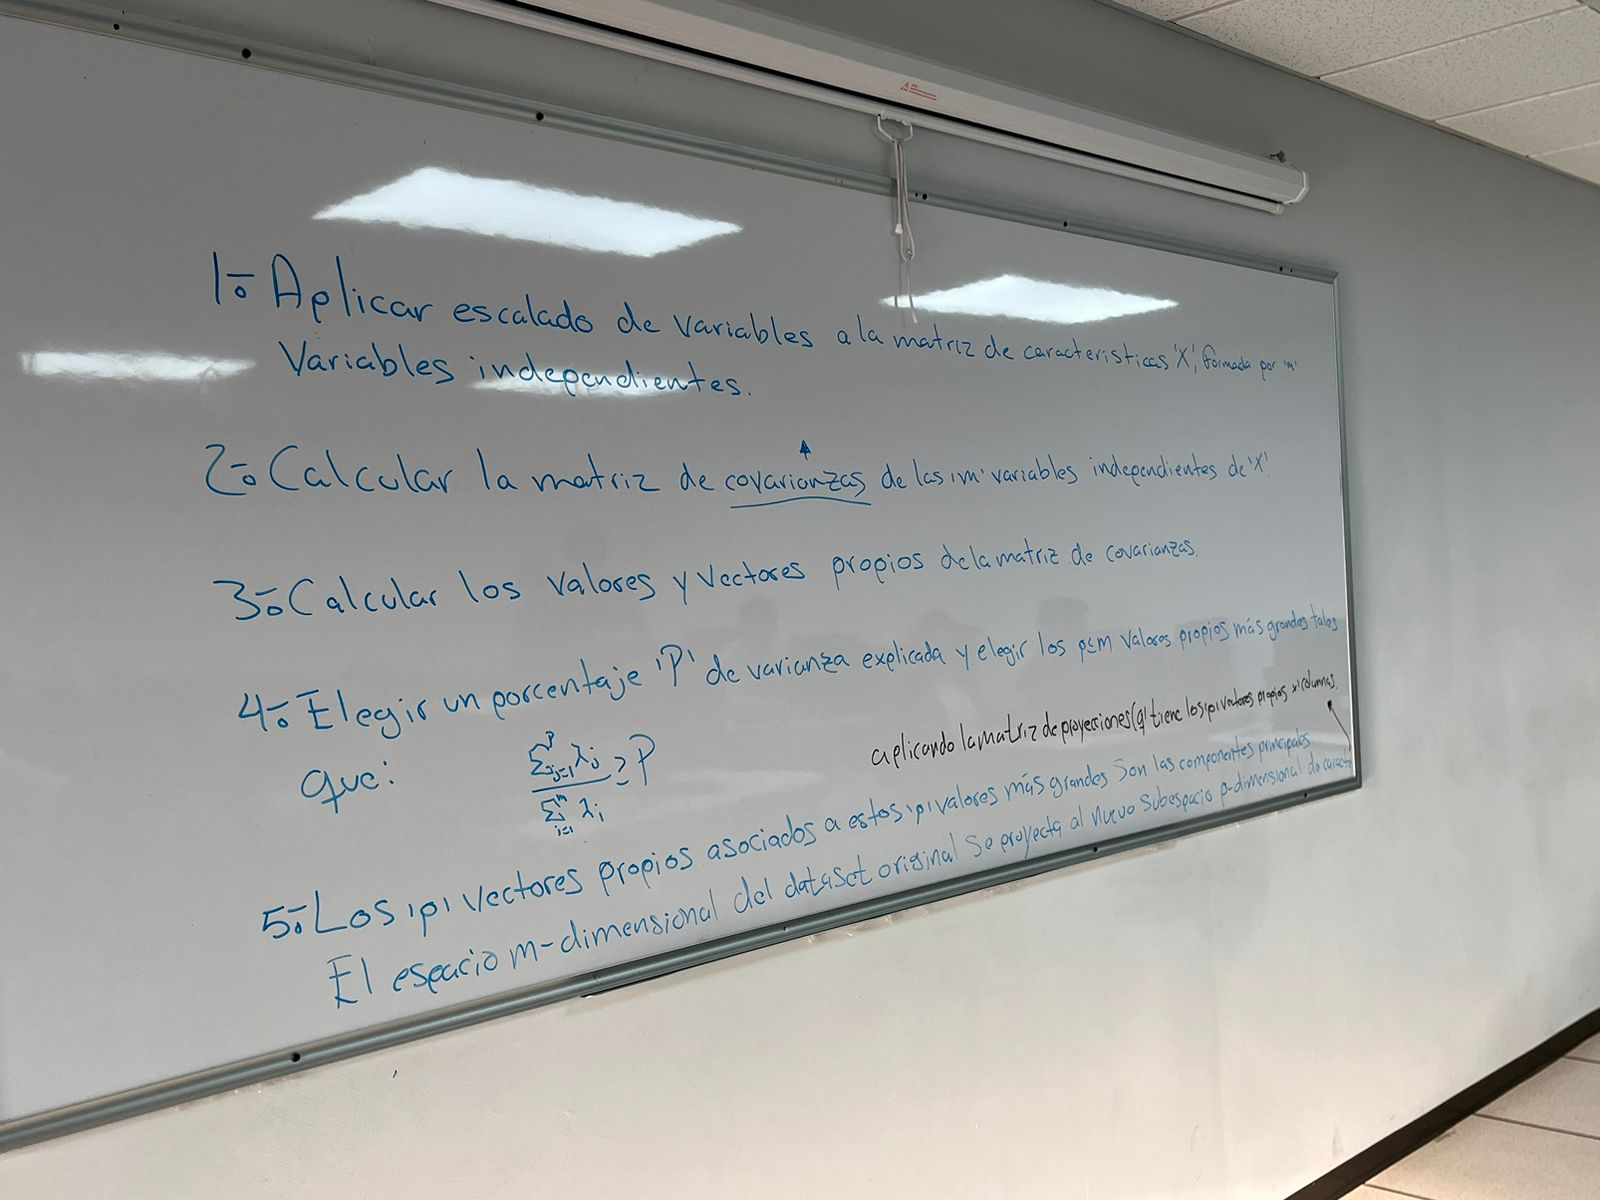

5.- Los 'p' vectores propios asociados a estos 'p' valores mas grandes son las componentes principales.

    El espacio m-dimensional del dataset original se proyecta al nuevo sub espacio p-dimnesional de caracteristicas
    aplicando la matriz de proyecciones (que tiene los 'p' vectores propios por columnas)

<a href = "https://setosa.io/ev/principal-component-analysis/"> EJEMPLOS </a>

## Aplicacion en caliente

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('../../DataSets/Wine.csv')
dataset

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [4]:
# Define x and y
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [11]:
x

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state = 0)

In [14]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)


In [15]:
x_train

array([[ 0.87668336,  0.79842885,  0.64412971, ...,  0.0290166 ,
        -1.06412236, -0.2059076 ],
       [-0.36659076, -0.7581304 , -0.39779858, ...,  0.0290166 ,
        -0.73083231, -0.81704676],
       [-1.69689407, -0.34424759, -0.32337513, ...,  0.90197362,
         0.51900537, -1.31256499],
       ...,
       [-0.70227477, -0.68615078, -0.65828065, ...,  0.46549511,
         0.51900537, -1.31256499],
       [ 1.13777093, -0.62316862, -0.91876272, ..., -0.18922266,
         1.03282752,  0.80164614],
       [ 1.4610222 ,  0.12361993,  0.42085937, ..., -1.45501034,
        -1.2168803 , -0.2719767 ]])

In [16]:
from sklearn.decomposition import PCA
# El profe de las 14-d quiere solo 2-d
pca = PCA(n_components = 2)

x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)
x_train

array([[-2.17884511e+00, -1.07218467e+00],
       [-1.80819239e+00,  1.57822344e+00],
       [ 1.09829474e+00,  2.22124345e+00],
       [-2.55584748e+00, -1.66210369e+00],
       [ 1.85698063e+00,  2.41573166e-01],
       [ 2.58288576e+00, -1.37668170e+00],
       [ 8.72876119e-01,  2.25618512e+00],
       [-4.18384029e-01,  2.35415681e+00],
       [-3.04977245e-01,  2.27659433e+00],
       [ 2.14082532e+00, -1.10052871e+00],
       [-2.98136465e+00, -2.47159183e-01],
       [ 1.96188242e+00,  1.25407738e+00],
       [-2.16177795e+00, -9.75966550e-01],
       [ 2.21976084e+00, -2.39507167e+00],
       [-2.30179529e+00, -2.05791962e-01],
       [-3.00953827e+00, -2.79141212e-01],
       [ 2.63443473e+00, -8.68313119e-01],
       [-1.09219965e+00, -3.53906625e+00],
       [ 2.62578435e+00, -2.96852840e-03],
       [ 1.98077342e-01,  2.29193443e+00],
       [-2.67442753e+00, -2.58800132e+00],
       [-2.54763698e+00, -4.52703891e-01],
       [ 1.77416736e+00,  8.43586940e-01],
       [-2.

In [17]:
from sklearn.linear_model import LogisticRegression
clasiffier = LogisticRegression(random_state=0)
clasiffier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = clasiffier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(cm)
acc

[[ 0  1 13]
 [ 2 13  1]
 [ 6  0  0]]


0.3611111111111111

In [20]:
y_pred

array([3, 1, 2, 3, 2, 3, 3, 1, 2, 2, 1, 1, 3, 2, 1, 2, 3, 3, 1, 3, 2, 2,
       3, 2, 2, 2, 2, 2, 1, 1, 3, 3, 2, 3, 3, 3], dtype=int64)

In [21]:
y_test

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1], dtype=int64)

C:\Users\MrJel\AppData\Local\Temp\ipykernel_4648\2832555469.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


<function matplotlib.pyplot.show(close=None, block=None)>

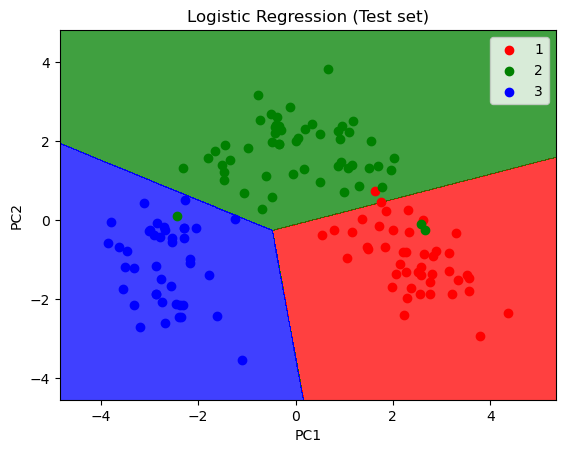

In [10]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1,x2 = np.meshgrid(np.arange(start = x_set[:,0].min() - 1, stop = x_set[:,0].max() + 1, step = 0.01),
                    np.arange(start = x_set[:,1].min() - 1, stop = x_set[:,1].max() + 1, step = 0.01))
plt.contourf(x1,x2,clasiffier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red','green','blue')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())

for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
              c = ListedColormap(('red','green','blue'))(i), label = j)

plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show
